# 1. Import

In [124]:
# 1.1 Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1.2 Import dataset
raw_data = pd.read_csv("https://archive.ics.uci.edu/static/public/468/data.csv")

# 1.3 Print the shape of data
print(raw_data.shape)

(12330, 18)


In [125]:
# 1.4 Print the first few lines of data
print(raw_data.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [126]:
# 1.5 Print the info of data
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# 2. Data Cleaning 

In [127]:
# 2.1 Create copy for d
data = raw_data.copy()

# 2.2 Check if there is any missing d
print("Number of missing values in data:\n", data.isnull().sum())
print("There is no missing values in data.")

# 2.3 Check if there is any duplicate data
print("Number of data records with duplicated ids: ",data.index.duplicated().sum())
print("Number of duplicated data records: ", data.duplicated().sum())
print("Duplicate Data: \n", data[data.duplicated()])

Number of missing values in data:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
There is no missing values in data.
Number of data records with duplicated ids:  0
Number of duplicated data records:  125
Duplicate Data: 
        Administrative  Administrative_Duration  Informational  \
158                 0                      0.0              0   
159                 0                      0.0              0   
178                 0                      0.0              0   
418                 0        

By investigation, there is no missing values in data and 125 duplicated data rows.

We observed that not all duplicate data are the same and the duplicated data are reasonable.

Therefore, we decided to keep the data unchanged

# 3 Data Transformation

In [128]:
# 3.1 Classify data into 3 types: Continuous Features, Discrete Features, Target
# Special Day is floating point numbers but categorized into 6 values, therefore we consider it as discrete data
cts_data = data[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']]
cts_target_data = data[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Revenue']]
discrete_data = data[['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'SpecialDay']]
discrete_target_data = data[['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'SpecialDay', 'Revenue']]
target = data['Revenue']

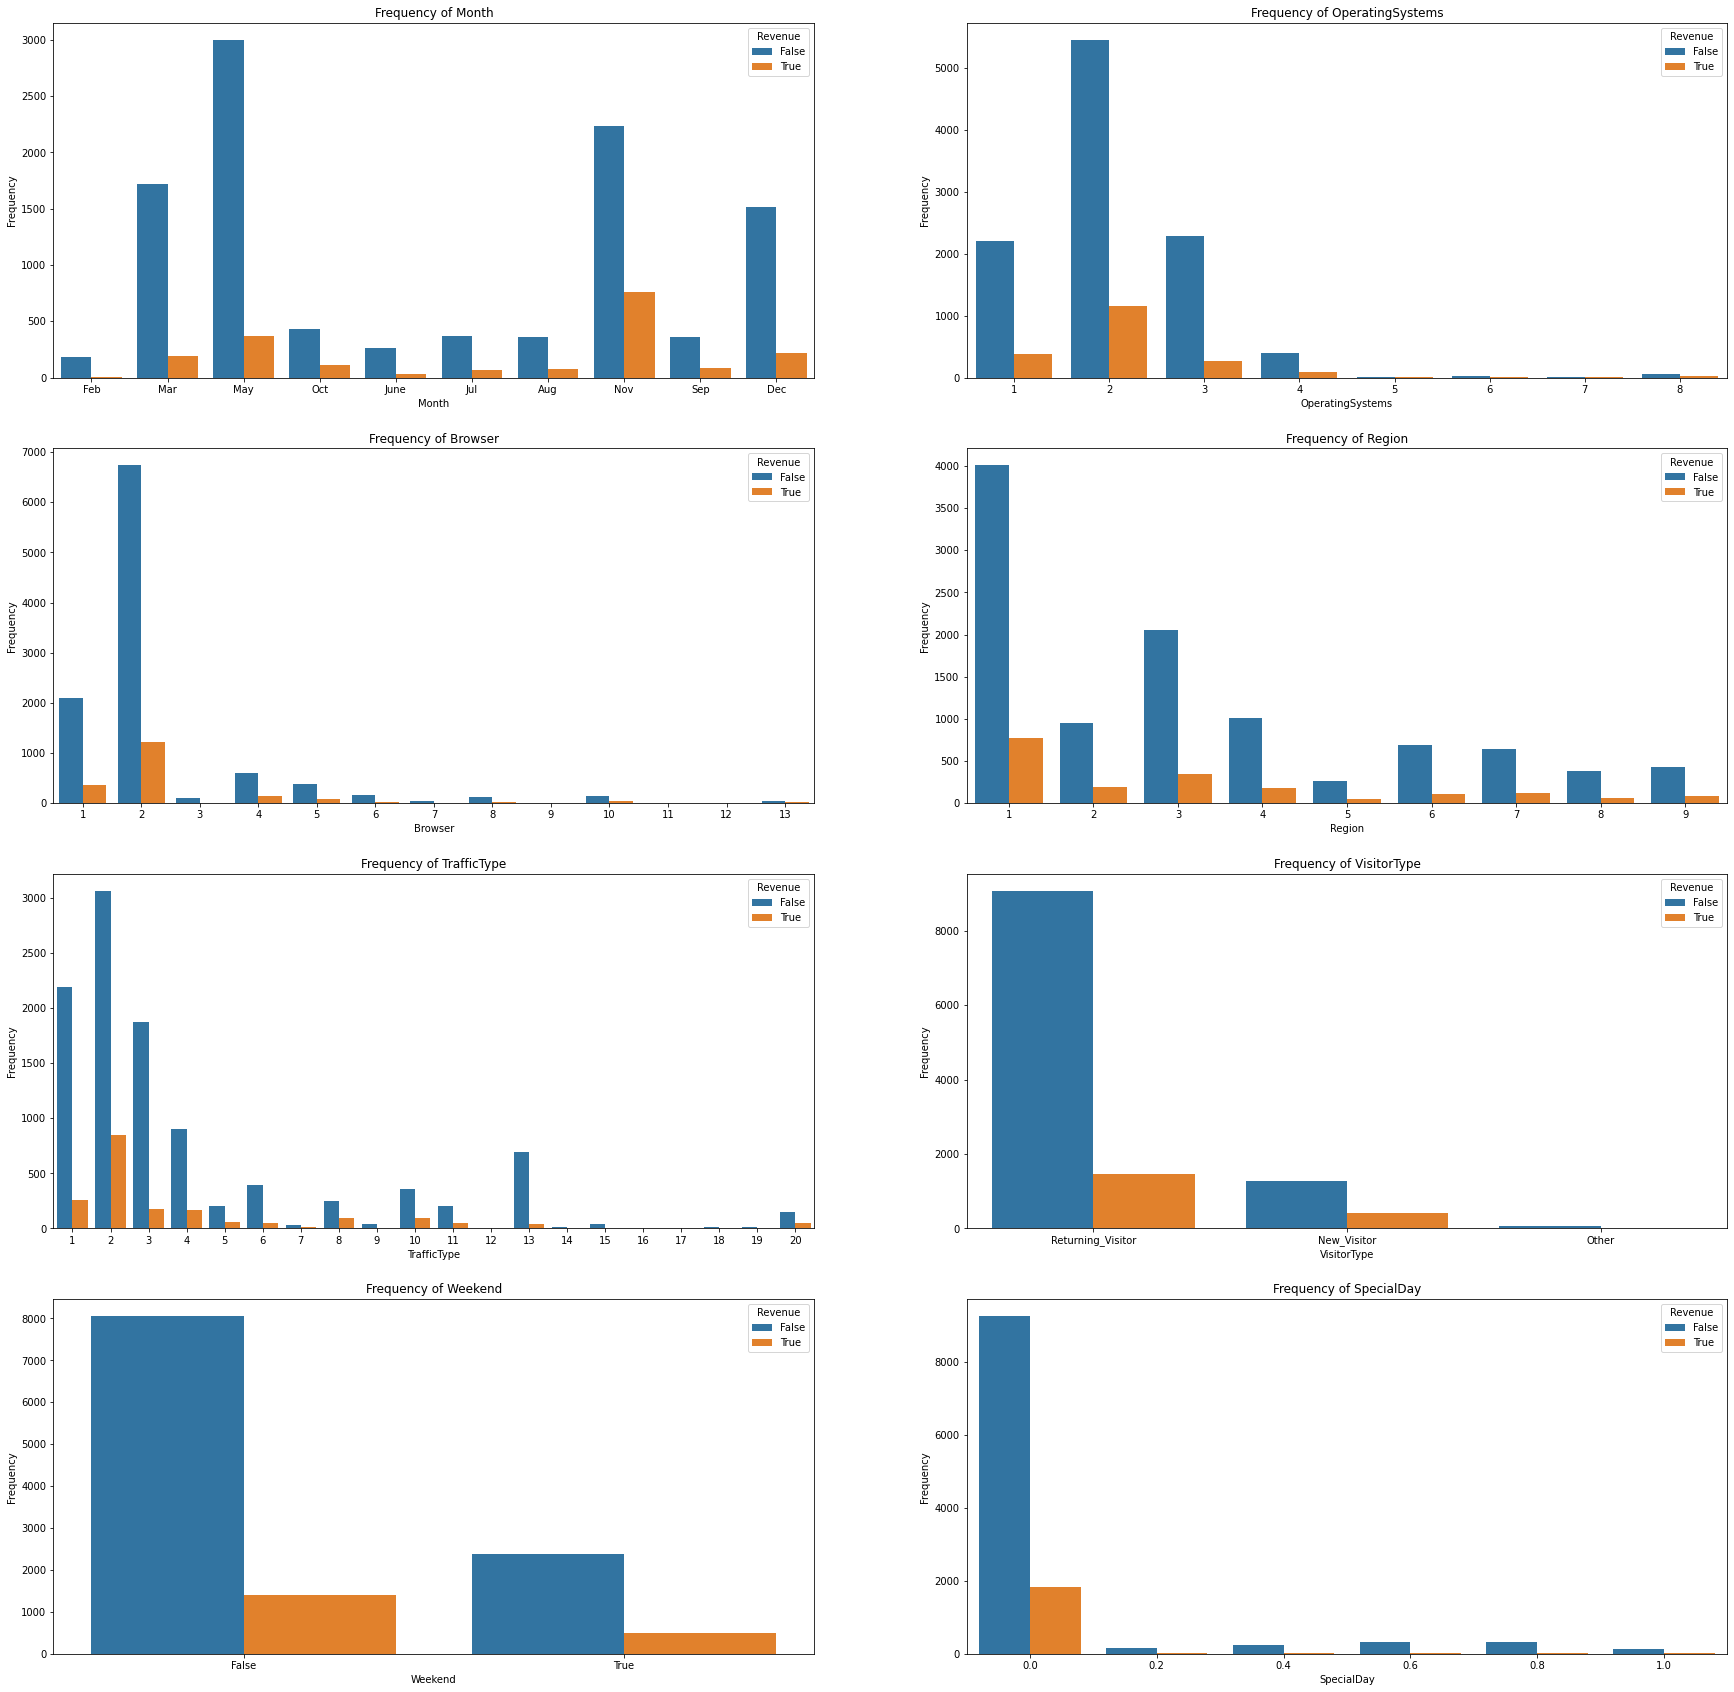

In [129]:
# 3.2 Use bar plot to the distribution of categorical features
fig, axes = plt.subplots(4, 2, figsize=(30, 30))

for idx, feature in enumerate(discrete_data.columns[:len(discrete_data.columns)]):
    row = idx // 2
    col = idx % 2
    # sns.barplot(ax=axes[row,col], x='Administrative', y='Administrative_Duration', hue='Revenue', data=shopping_online)
    # sns.barplot(ax=axes[row, col], data=discrete_target_data, x=feature, y='count', stat="density", hue="Revenue")
    # axes[row,col].bar(discrete_target_data[feature].value_counts().index, discrete_target_data[feature].value_counts().values)
    sns.countplot(ax=axes[row, col], data=data, x=feature, hue='Revenue')
    axes[row,col].set_title('Frequency of ' + feature)
    axes[row,col].set_ylabel('Frequency')
    # plt.title('Sessions ended with shopping')
    # plt.xticks([0, 1], ['False', 'True'])

In [130]:
# 3.3 Encode Binary Categorical Data (Month, Weekend and Revenue)

data['Weekend'] = data['Weekend'].astype(int)
data['Revenue'] = data['Revenue'].astype(int)

vistorType_mapping = {'Returning_Visitor': 0, 'New_Visitor': 1, 'Other': 2}
# data['VisitorType'] = data['VisitorType'].map(vistorType_mapping)

month_mapping = { 'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
mapped_month = data['Month'].map(month_mapping)

# One-hot Encoding for categorical Data with multiple classes  (Month, OperatingSystems, Browser, Region, TrafficType, VistorType)
# For categorical variables with k level, we created k-1 binary variables to indicate the values of categorical variables

# Month
for idx, key in enumerate(data['Month'].unique()[:-1]):
    data[key] = (data['Month']==key).astype(int)

# OperatingSystems
for idx, key in enumerate(data['OperatingSystems'].unique()[:-1]):
    data['OS_'+str(key)] = (data['OperatingSystems']==key).astype(int)

# Browser
for idx, key in enumerate(data['Browser'].unique()[:-1]):
    data['Browser_'+str(key)] = (data['Browser']==key).astype(int)
    
# Region
for idx, key in enumerate(data['Region'].unique()[:-1]):
    data['Region_'+str(key)] = (data['Region']==key).astype(int)

# TrafficType
for idx, key in enumerate(data['TrafficType'].unique()[:-1]):
    data['TrafficType_'+str(key)] = (data['TrafficType']==key).astype(int)
    
# VistorType
for idx, key in enumerate(data['VisitorType'].unique()[:-1]):
    data['Vistor_'+key] = (data['VisitorType']==key).astype(int)
    
data = data.drop(columns=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType'])

# 4. Exploratory Data Analysis

In [131]:
# 4.1 Show the Summary Statistics for continuous data
cts_data_target = data[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
                    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
                    'Revenue']]
summary = cts_data_target.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].style.set_caption('Summary Statistics').background_gradient(cmap='Blues')
display(summary)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


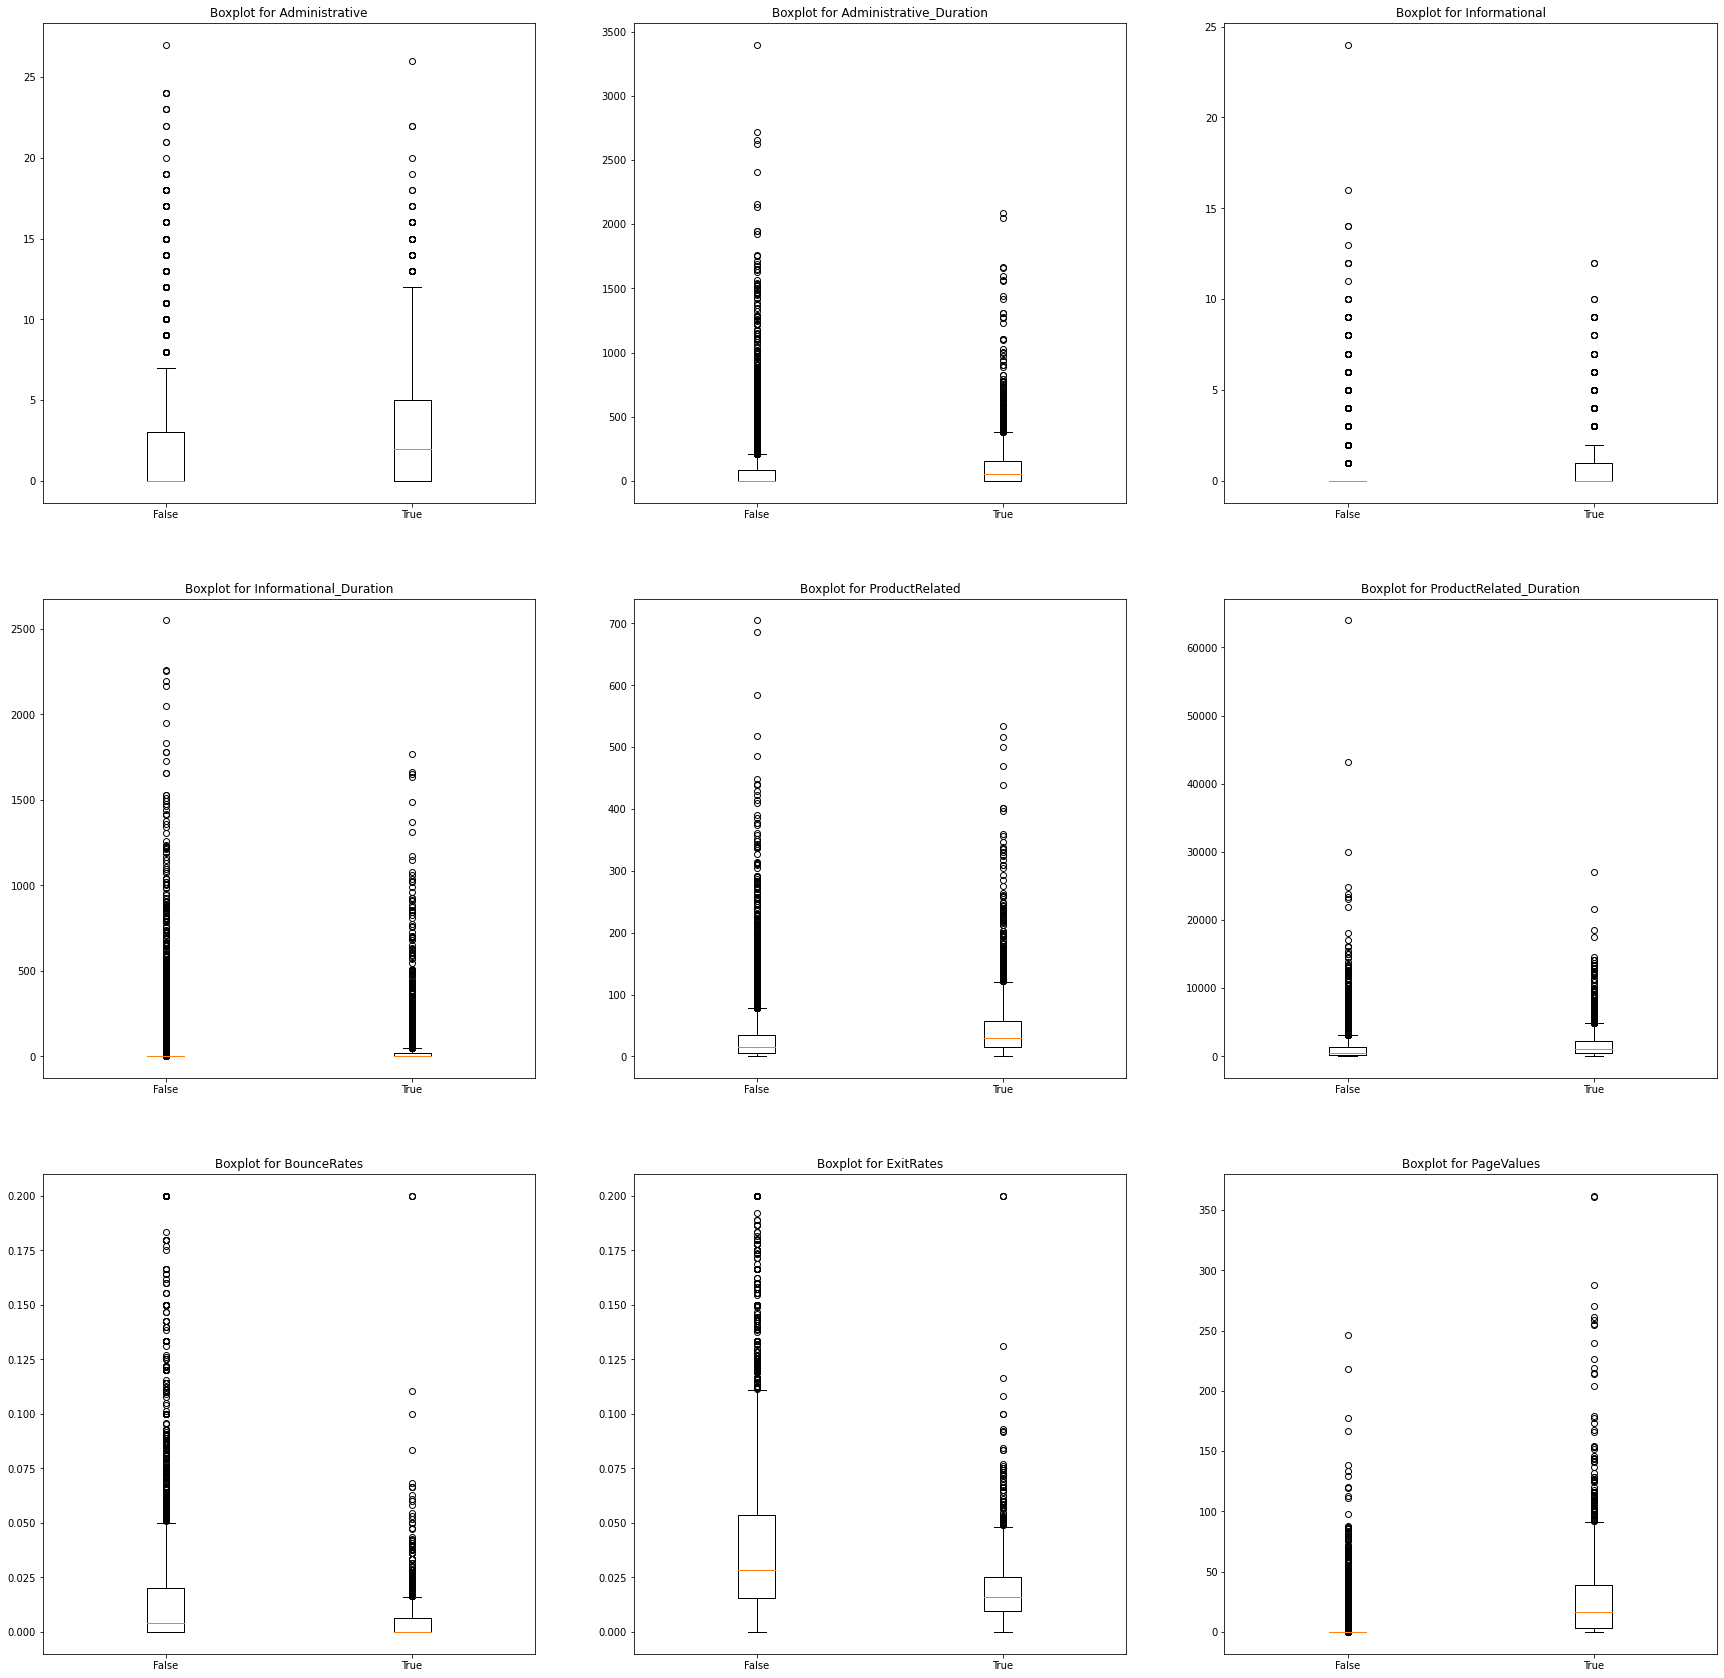

In [132]:
# 4.5 Use box plot to check if there is any outliers in features
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

for idx, feature in enumerate(cts_data.columns[:len(cts_data.columns)]):
    row = idx // 3
    col = idx % 3
    # axes[row, col].boxplot(data[feature])
    axes[row, col].boxplot([data[data['Revenue']==0][feature], data[data['Revenue']==1][feature]])
    axes[row, col].set_xticklabels(["False", "True"])
    axes[row, col].set_title("Boxplot for "+feature)

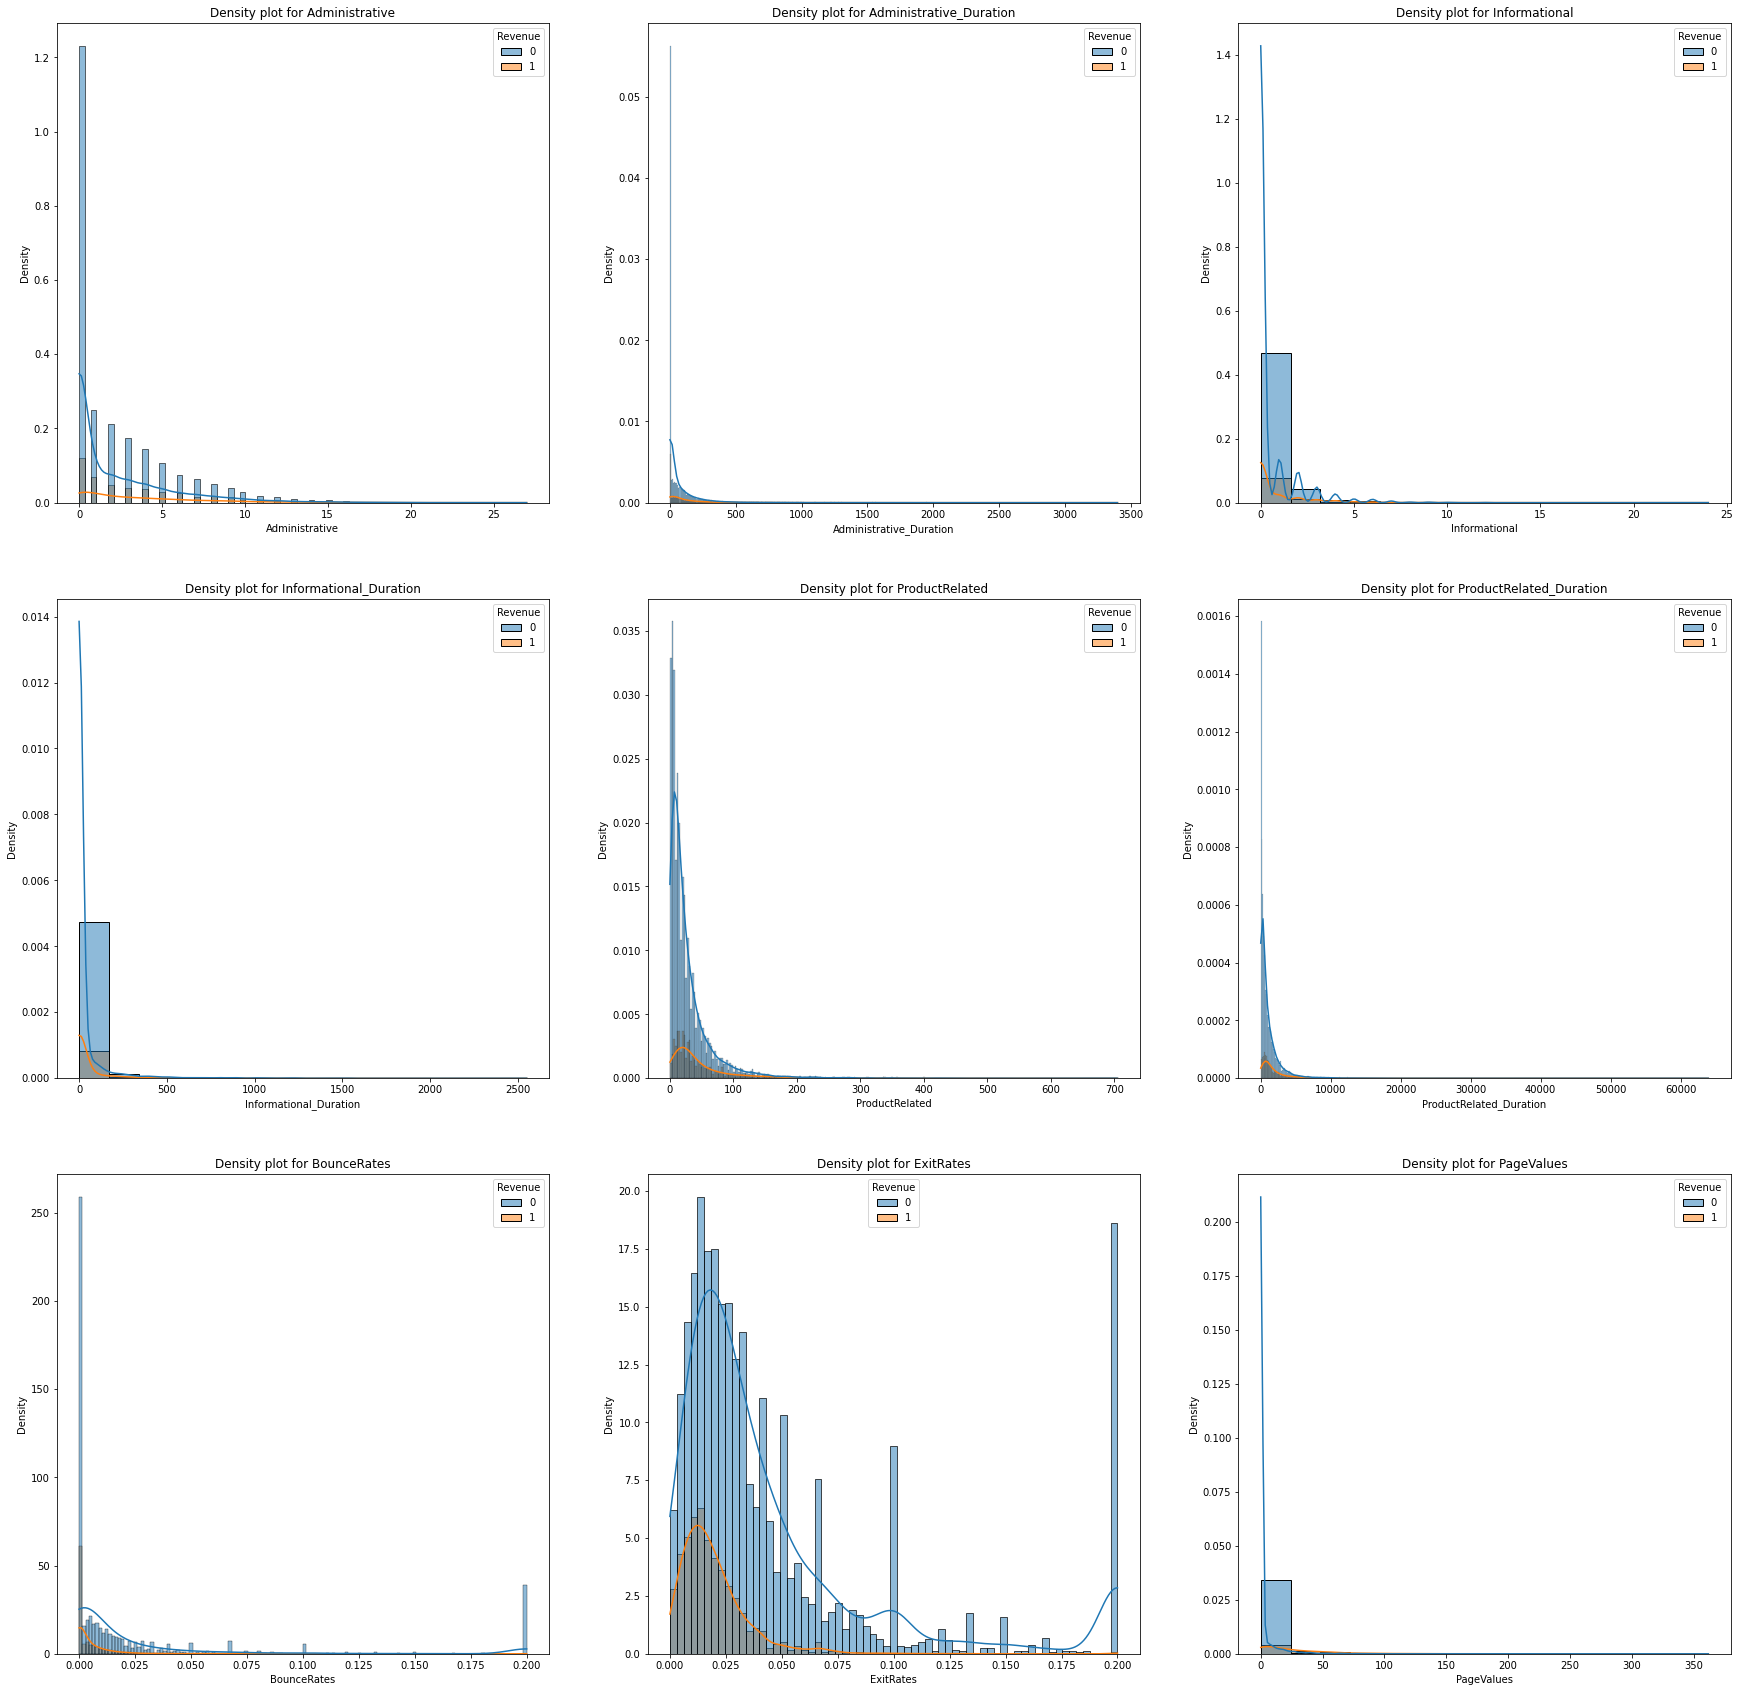

In [133]:
# 4.3 Use hisplot to check distributions
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

for idx, feature in enumerate(cts_data.columns[:len(cts_data.columns)]):
    row = idx // 3
    col = idx % 3
    sns.histplot(ax=axes[row, col], data=cts_data_target, x=feature, stat="density", hue="Revenue", kde=True)
    axes[row, col].set_title("Density plot for "+feature)

In [134]:
# 4.4 Remove Outliers
num_data_removed = len(data[((data['Administrative'] > 25) | 
              (data['Administrative_Duration'] > 1500) | 
              (data['Informational'] > 20) | 
              (data['Informational_Duration'] > 800) | 
              (data['ProductRelated'] > 300) | 
              (data['ProductRelated_Duration'] > 10000) | 
              (data['PageValues'] > 150))])

data = data[~((data['Administrative'] > 25) | 
              (data['Administrative_Duration'] > 1500) | 
              (data['Informational'] > 20) | 
              (data['Informational_Duration'] > 800) | 
              (data['ProductRelated'] > 300) | 
              (data['ProductRelated_Duration'] > 10000) | 
              (data['PageValues'] > 150))]

cts_data = data[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']]
target = data['Revenue']

print("The number of records removed = ", num_data_removed)

The number of records removed =  238


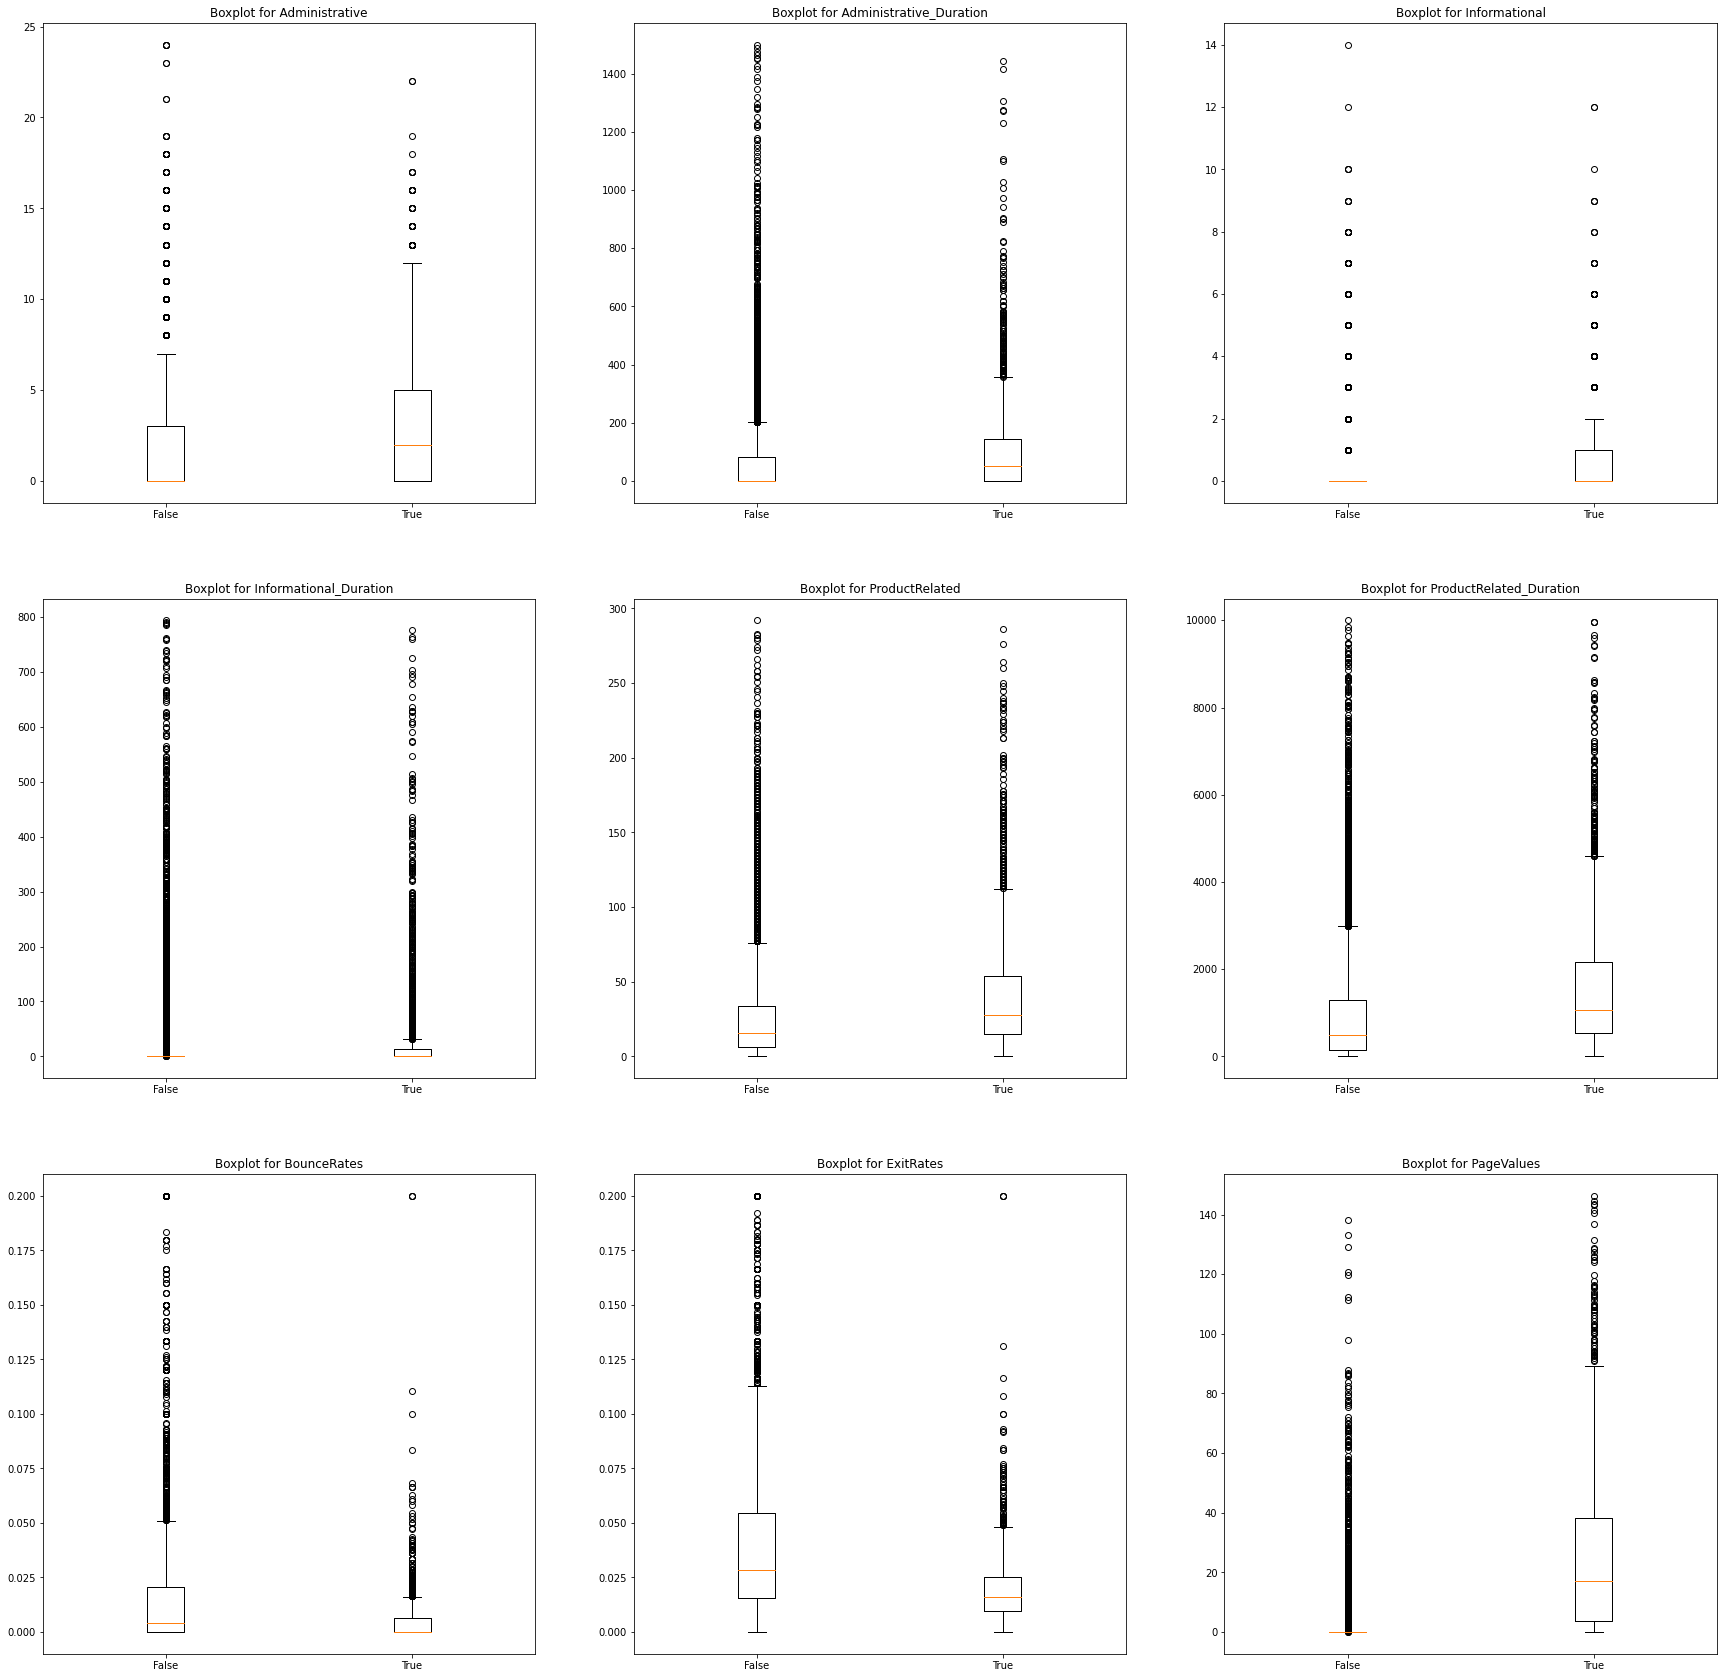

In [135]:
# 4.5 Use box plot to check again
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

for idx, feature in enumerate(cts_data.columns[:len(cts_data.columns)]):
    row = idx // 3
    col = idx % 3
    # axes[row, col].boxplot(data[feature])
    axes[row, col].boxplot([data[data['Revenue']==0][feature], data[data['Revenue']==1][feature]])
    axes[row, col].set_xticklabels(["False", "True"])
    axes[row, col].set_title("Boxplot for "+feature)

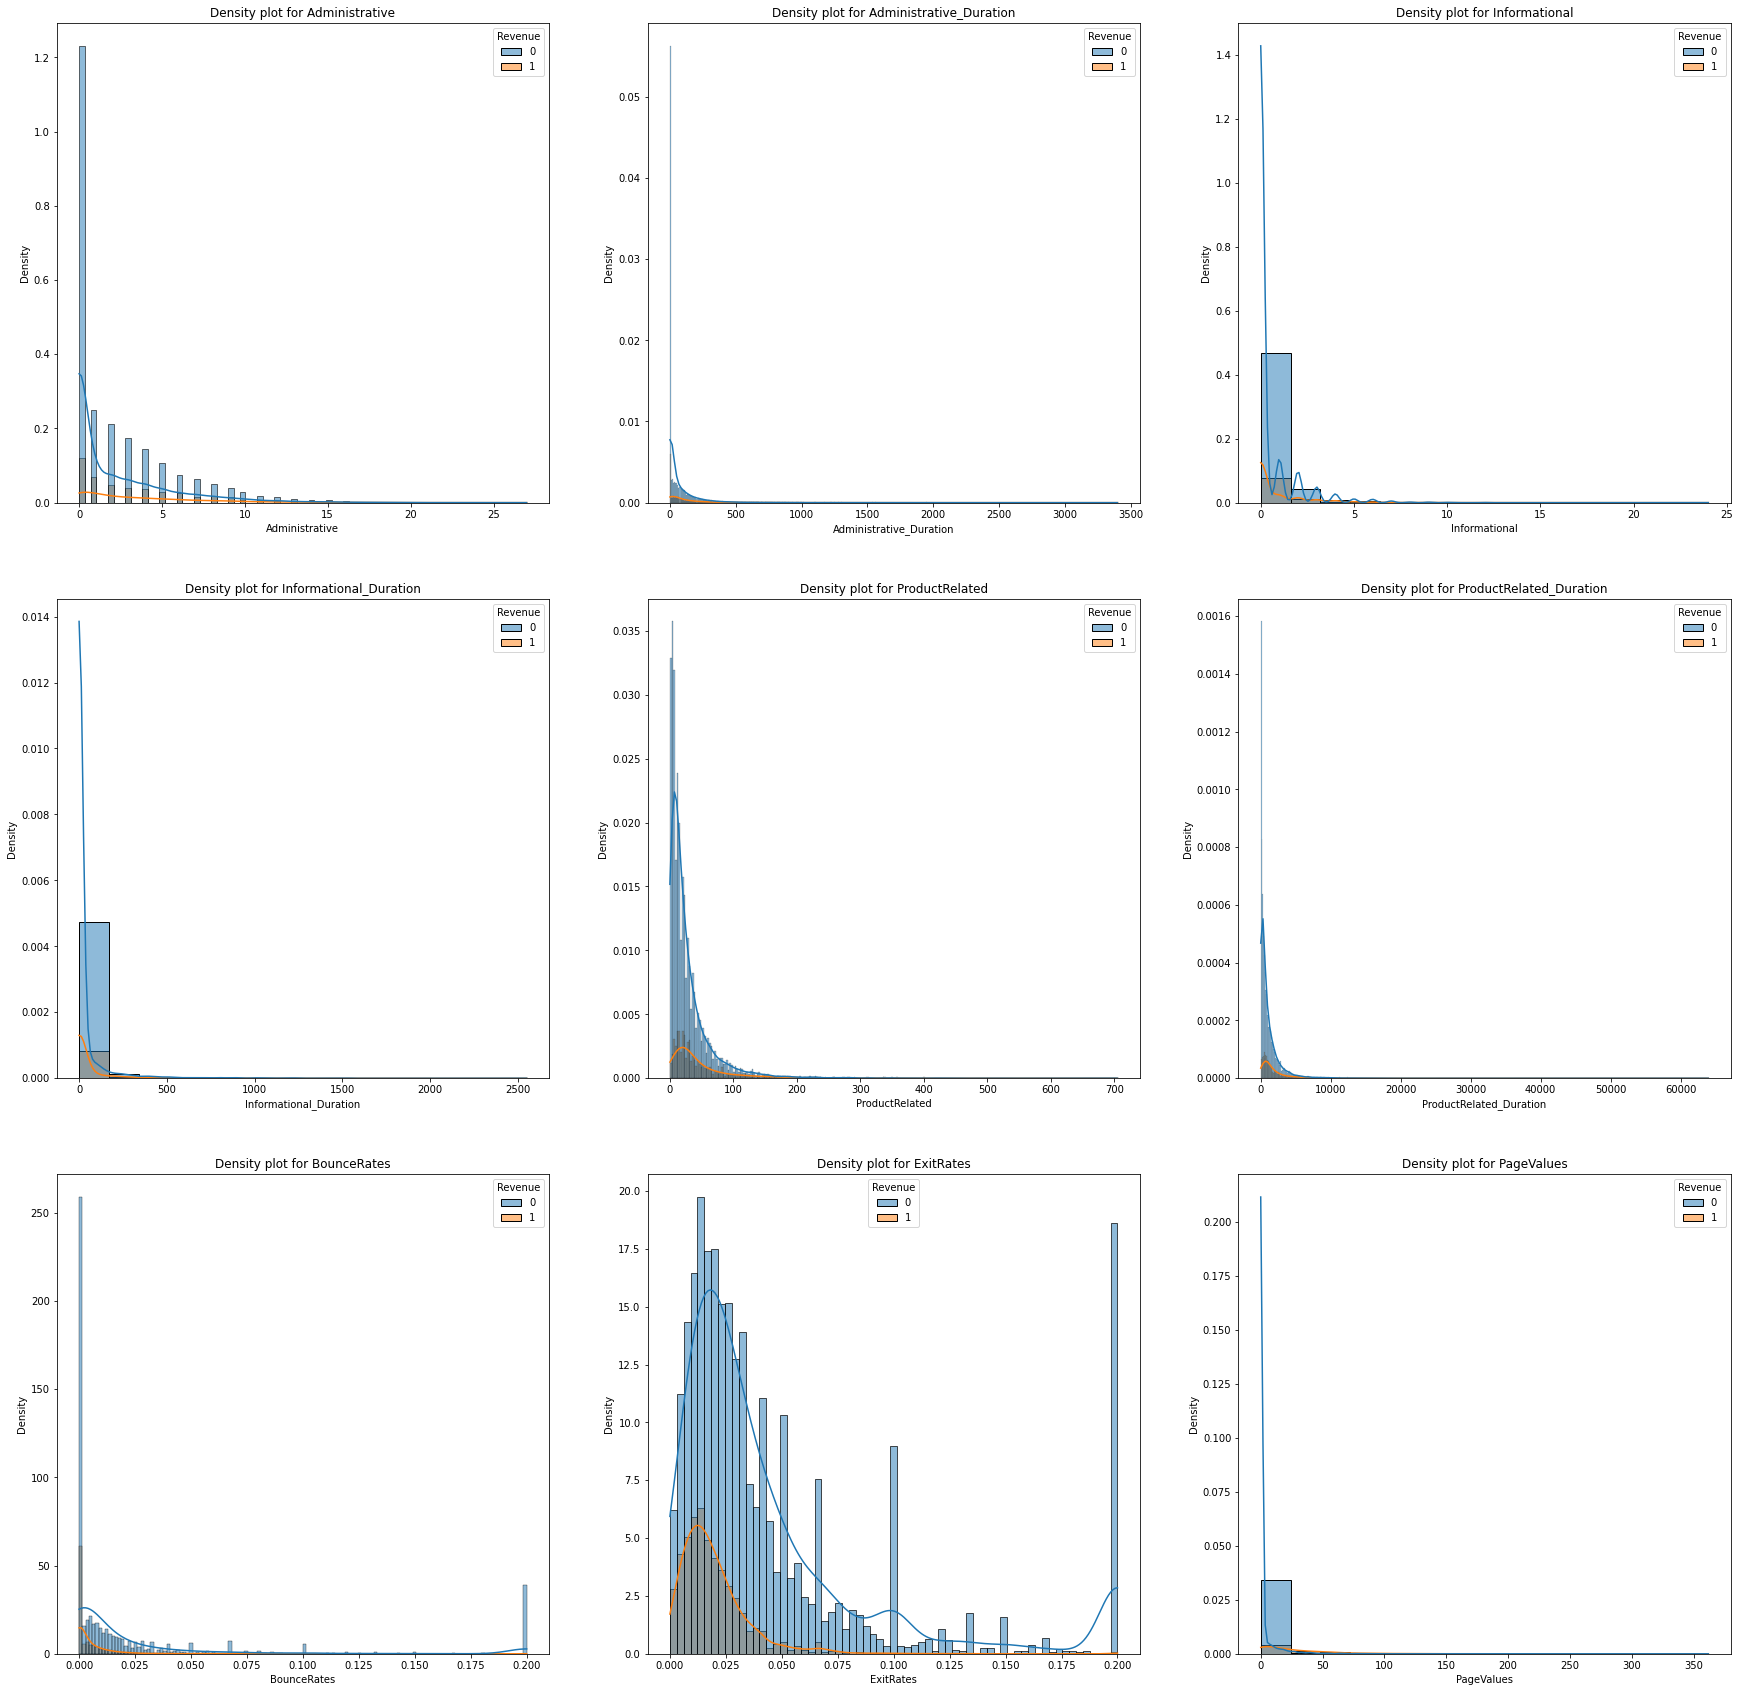

In [136]:
# 4.6 Use box plot to check again
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

for idx, feature in enumerate(cts_data.columns[:len(cts_data.columns)]):
    row = idx // 3
    col = idx % 3
    sns.histplot(ax=axes[row, col], data=cts_data_target, x=feature, stat="density", hue="Revenue", kde=True)
    axes[row, col].set_title("Density plot for "+feature)

We observed that the continuous features are highly left skewed. Therefore, we would like to perform normalization on the data.

([<matplotlib.axis.XTick at 0x14ab39c18>,
 [Text(0, 0, 'False'), Text(1, 0, 'True')])

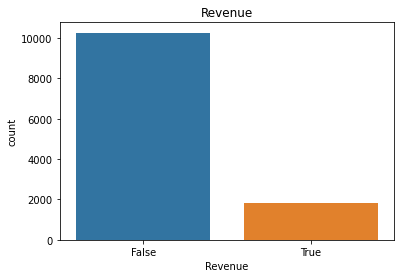

In [137]:
# 4.7 Use Barplot to check the frequency of target variable

sns.countplot(data=data, x='Revenue')
plt.title('Revenue')
plt.xticks([0, 1], ['False', 'True'])

By observation, the barplot shows there is a class imbalance in our data.
Therefore, we would try different methods to deal with it.

# 5 Multivariate Analysis

We observed that there is linear relation between BounceRates and ExitRates.

In [138]:
# 5.1 Correlation
data.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_18,TrafficType_19,TrafficType_16,TrafficType_17,Vistor_Returning_Visitor,Vistor_New_Visitor
Administrative,1.000000,0.650332,0.361232,0.289143,0.423637,0.371822,-0.225194,-0.318508,0.120108,-0.097450,...,-0.006328,-0.045537,0.000172,-0.015120,-0.001188,-0.010437,0.003768,-0.006328,-0.033980,0.039375
Administrative_Duration,0.650332,1.000000,0.277455,0.230636,0.266437,0.284445,-0.160343,-0.230315,0.091558,-0.078831,...,-0.004587,-0.026792,0.001518,-0.001493,-0.000377,-0.011962,0.023801,-0.004587,-0.031366,0.035909
Informational,0.361232,0.277455,1.000000,0.700273,0.329866,0.327703,-0.116457,-0.164280,0.071083,-0.050465,...,-0.003610,-0.029437,-0.003299,-0.001558,-0.003852,-0.006469,-0.006253,-0.003610,0.049425,-0.045776
Informational_Duration,0.289143,0.230636,0.700273,1.000000,0.253426,0.263928,-0.090014,-0.130911,0.066463,-0.040167,...,-0.002624,-0.026065,-0.000255,-0.012400,0.001047,-0.000637,-0.004546,-0.002624,0.035737,-0.033696
ProductRelated,0.423637,0.266437,0.329866,0.253426,1.000000,0.846327,-0.235523,-0.334723,0.084917,-0.020368,...,-0.006771,0.007560,-0.001609,-0.020862,-0.012513,-0.010043,-0.006210,-0.006512,0.136466,-0.129541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TrafficType_19,-0.010437,-0.011962,-0.006469,-0.000637,-0.010043,-0.007842,0.003481,0.006543,-0.003982,0.029696,...,-0.000331,-0.009213,-0.001147,-0.002044,-0.001047,1.000000,-0.000573,-0.000331,0.008533,-0.007990
TrafficType_16,0.003768,0.023801,-0.006253,-0.004546,-0.006210,-0.005354,-0.007251,-0.008220,-0.005503,-0.004893,...,-0.000143,-0.003987,-0.000497,-0.000884,-0.000453,-0.000573,1.000000,-0.000143,-0.008422,0.008902
TrafficType_17,-0.006328,-0.004587,-0.003610,-0.002624,-0.006512,-0.006628,0.005114,0.005851,-0.003177,0.042704,...,-0.000083,-0.002302,-0.000287,-0.000511,-0.000262,-0.000331,-0.000143,1.000000,0.003746,-0.003643
Vistor_Returning_Visitor,-0.033980,-0.031366,0.049425,0.035737,0.136466,0.134335,0.131152,0.173662,-0.102023,0.088434,...,0.003746,0.097344,0.005524,0.014736,0.003681,0.008533,-0.008422,0.003746,1.000000,-0.972496


<AxesSubplot:>

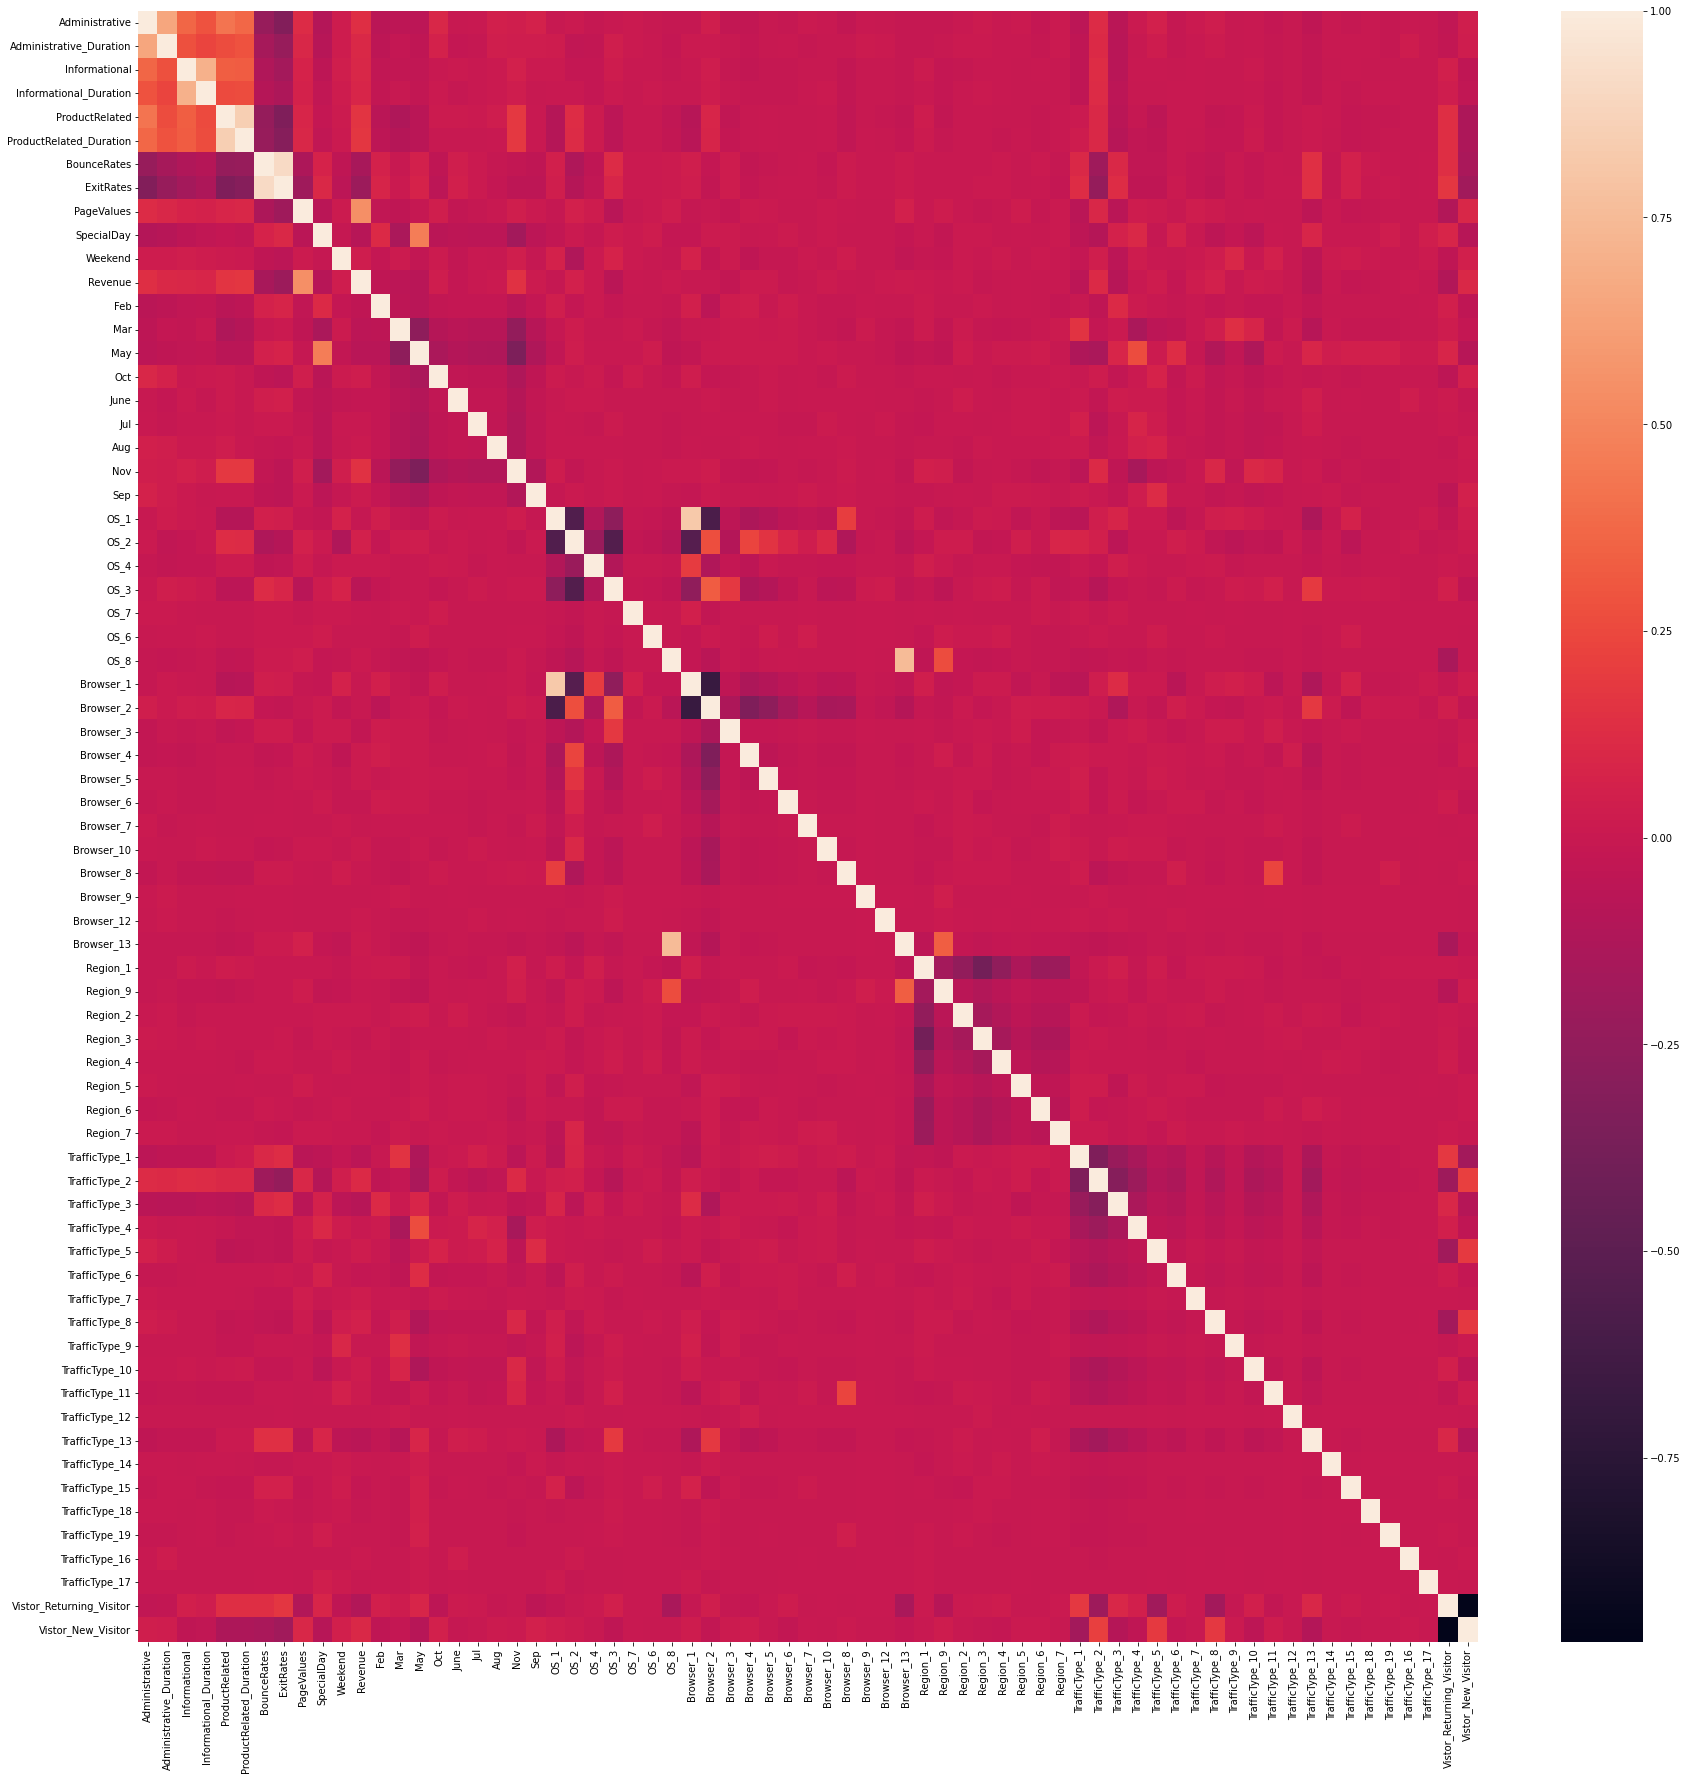

In [139]:
# 5.2 Correlation Matrix
plt.subplots(1, 1, figsize=(30, 30))
data_correlation = data.corr()
sns.heatmap(data=data_correlation)

By heatmap, We oberserved that there is high correlation between BounceRates and ExitRates.

Other than some of the correlations between different types of browsers ans Operating Systems, we observed that there is no strong correlation between binary and continuous variables.

Therefore, we would like to plot the pairplot for cts variables.

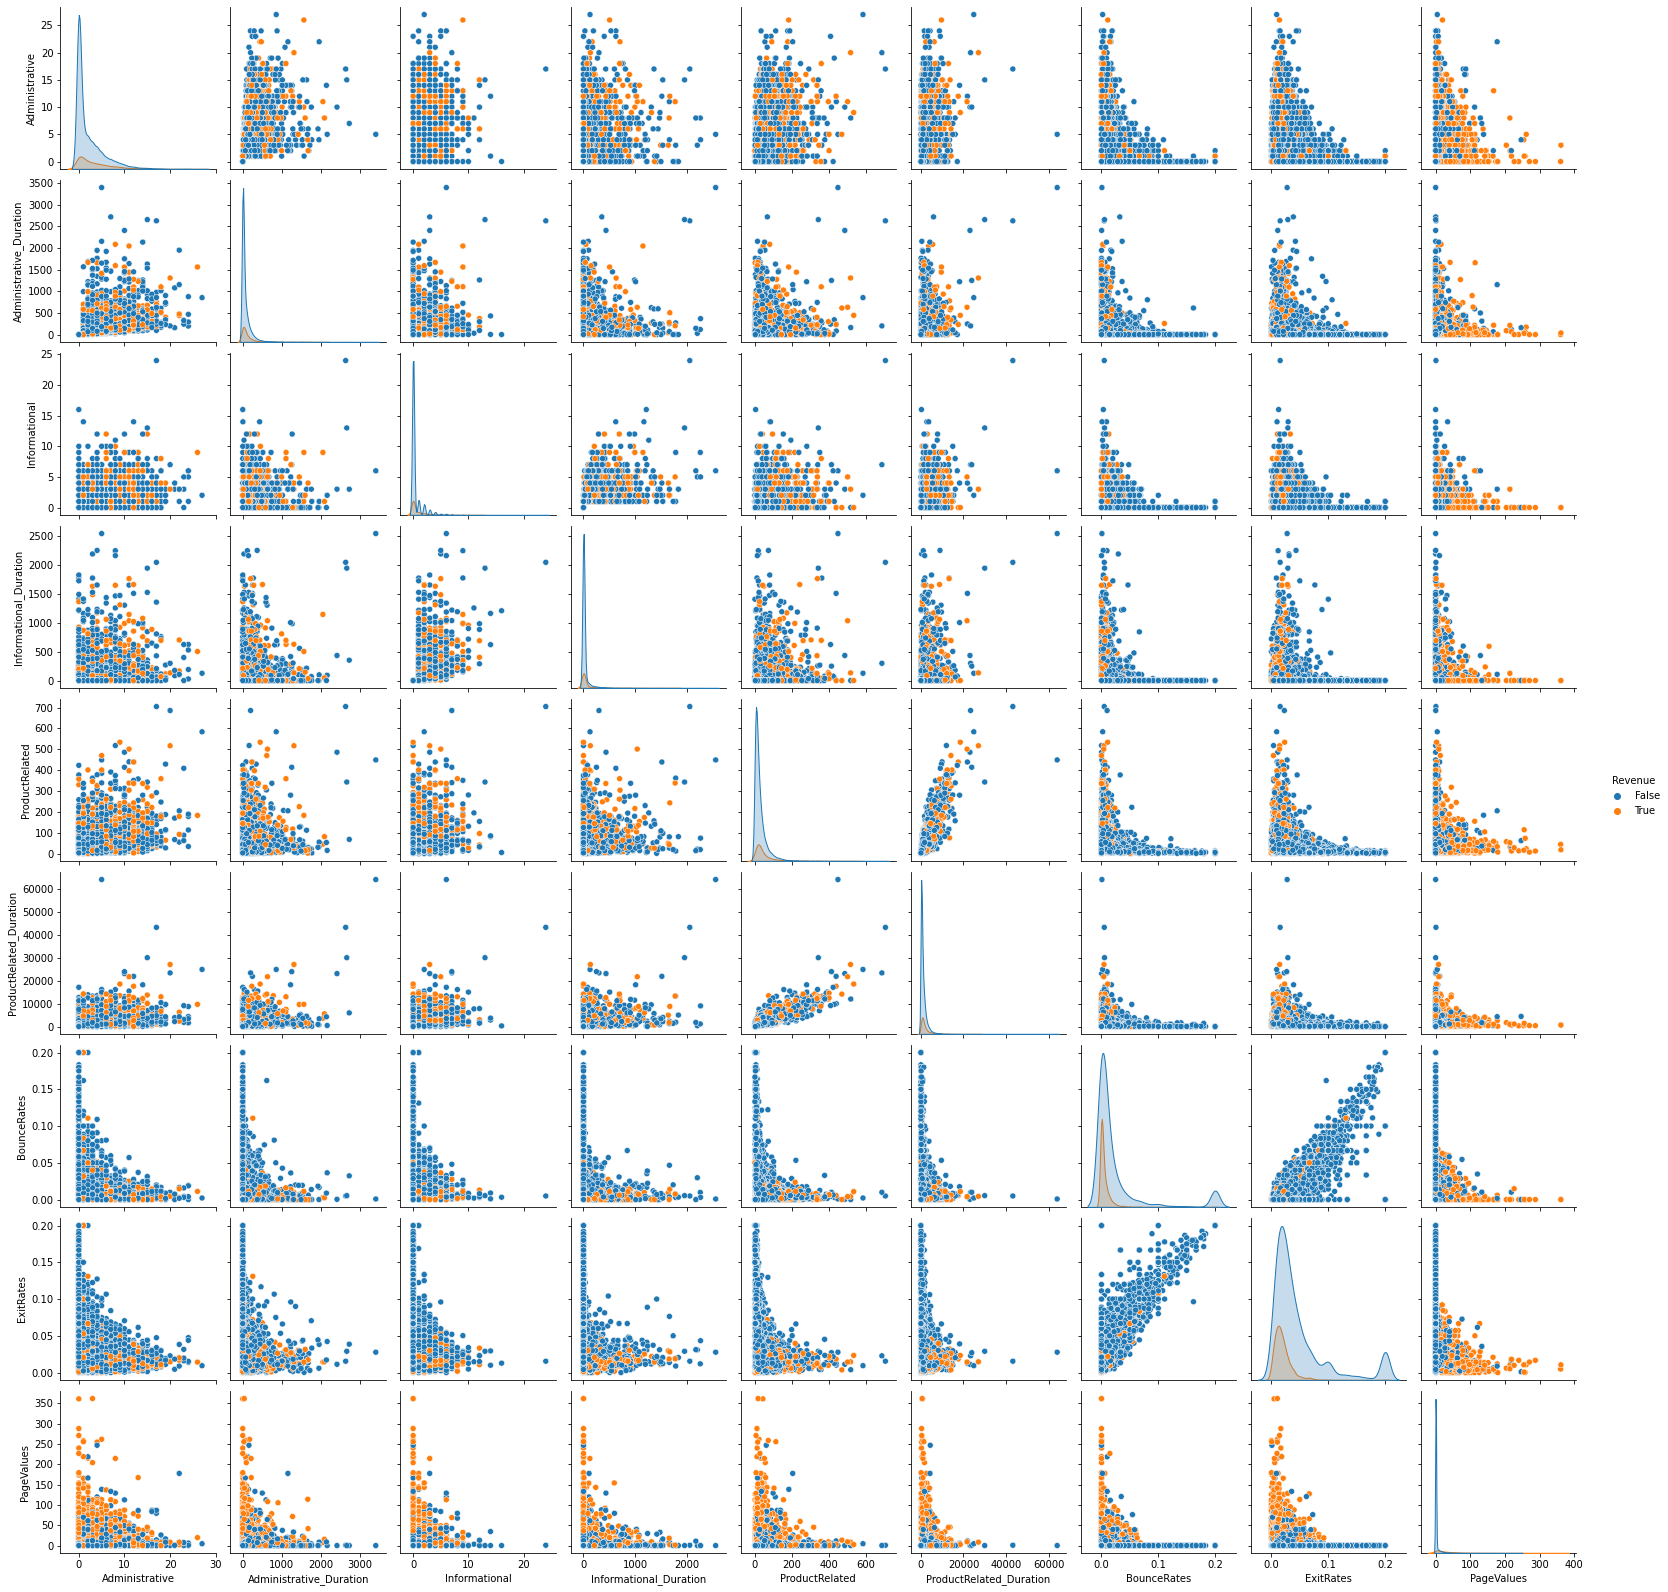

In [140]:
sns.pairplot(data=cts_target_data, hue='Revenue')

In [141]:
data.groupby(['May','SpecialDay'])['Revenue'].agg(['count'])
data['May'].corr(data['SpecialDay'])

0.4644739338376465

# 6 Save Processed Data

In [142]:
data.to_csv("../data/processedData.csv", index=False)